In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

## Liner Regression

### The Normal Equation

Saving figure generated_data_plot


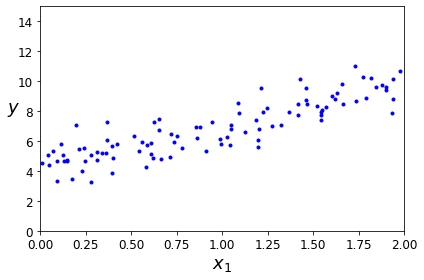

In [2]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
save_fig("generated_data_plot")
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [4]:
#using matmul instead of np.ndarray.dot()
mtx1 = np.matmul(X_b.T, X_b)
mtx2 = np.matmul(X_b.T, y)
mtx3 = np.linalg.inv(mtx1)
mtx  = np.matmul(mtx3, mtx2)
print(mtx)

[[4.21509616]
 [2.77011339]]


Полученные значения соответствут тем, что были заданы для генерации данных. Отличия из-за шума, созданного нормальным распределением. y = 4 + 3x1 + шум Гаусса. Теперь, мы можем делать прогнозы:

In [5]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
print(X_new_b)
y_predict = X_new_b.dot(theta_best)
y_predict

[[1. 0.]
 [1. 2.]]


array([[4.21509616],
       [9.75532293]])

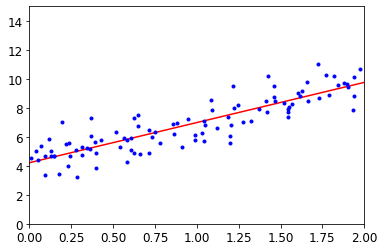

In [6]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

используем библиотеку линейной регрессии sklean

In [7]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
print(lin_reg.intercept_)
print(lin_reg.coef_)

y_pred = lin_reg.predict(X_new)
print(y_pred)

[4.21509616]
[[2.77011339]]
[[4.21509616]
 [9.75532293]]


Вычисление коэф. вручную используя метод наименьших квадратов, используемый в LinearRegression

In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

## Градиентный спуск

### Batch Gradient Descent

In [9]:
theta_path_bgd = []

eta = 0.1  # learning rate
n_iterations = 1000
m = len(X_b) #100

theta = np.random.randn(2,1)  # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    theta_path_bgd.append(theta)
    
print(theta)

[[4.21509616]
 [2.77011339]]


### Stochastic Gradient Descent 

Saving figure sgd_plot


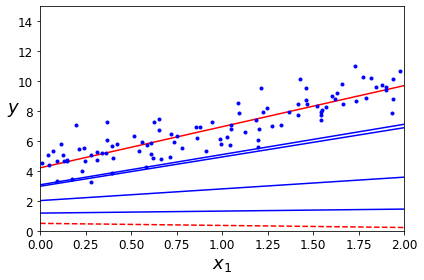

[[4.21076011]
 [2.74856079]]


In [10]:
np.random.seed(42)

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

def m_plot_line(style):
    y_predict = X_new_b.dot(theta)
    plt.plot(X_new, y_predict, style)

m_plot_line("r--")
    
for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 5 and i !=0:
            m_plot_line("b-")            
        random_index = np.random.randint(m) #select random instance
        xi = X_b[random_index:random_index+1] #random instance
        yi = y[random_index:random_index+1] #appropriate label
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #commmon gradient 
        eta = learning_schedule(epoch * m + i) #dynamic learning rate
        theta = theta - eta * gradients
        #print("epoch {0} theta:\n{1}".format(epoch, theta))

m_plot_line("r-")    
plt.plot(X, y, "b.")                                 # not shown
plt.xlabel("$x_1$", fontsize=18)                     # not shown
plt.ylabel("$y$", rotation=0, fontsize=18)           # not shown
plt.axis([0, 2, 0, 15])                              # not shown
save_fig("sgd_plot")                                 # not shown
plt.show()                                           # not shown

print(theta)

In [11]:
theta_path_sgd = []

n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):          
        random_index = np.random.randint(m) #select random instance
        xi = X_b[random_index:random_index+1] #random instance
        yi = y[random_index:random_index+1] #appropriate label
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi) #commmon gradient 
        eta = learning_schedule(epoch * m + i) #dynamic learning rate
        theta = theta - eta * gradients #model parameters                                    # not shown
        theta_path_sgd.append(theta)
        
print(theta)

[[4.18545376]
 [2.77900595]]


In [12]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.24365286]), array([2.8250878]))

### Mini-batch Gradient Descent

In [13]:
np.random.seed(42)

theta_path_mgd = []

n_iterations = 50
minibatch_size = 20
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000

def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
print(theta)

[[4.25214635]
 [2.7896408 ]]


In [14]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

Saving figure gradient_descent_paths_plot


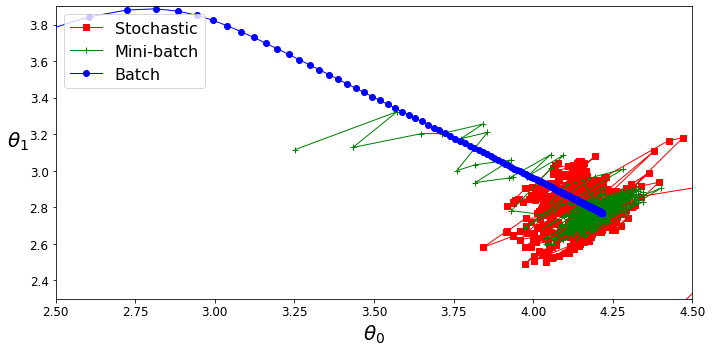

In [15]:
plt.figure(figsize=(10,5))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=1, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=1, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
save_fig("gradient_descent_paths_plot")
plt.show()

## Polynomial Regression

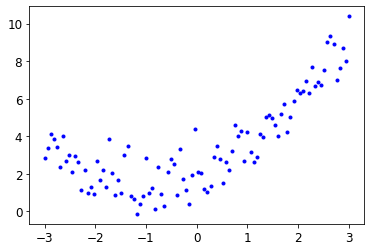

In [16]:
m = 100

X = np.linspace(-3, 3, m).reshape(m,1)
np.random.shuffle(X)
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)
plt.plot(X, y, "b.")
plt.show()

In [17]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[2.09090909]
[2.09090909 4.37190083]


In [18]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97113438]), array([[0.9930382 , 0.49919409]]))

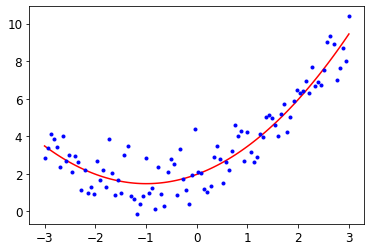

In [19]:
x_ = np.linspace(-3, 3, 100).reshape(100, 1)
f_ = PolynomialFeatures(degree=2, include_bias=False)
x__ = f_.fit_transform(x_)
y_ = lin_reg.predict(x__)
plt.plot(x_, y_, "r-")
plt.plot(X, y, "b.")
plt.show()

## Learning Curves

Saving figure underfitting_learning_curves_plot


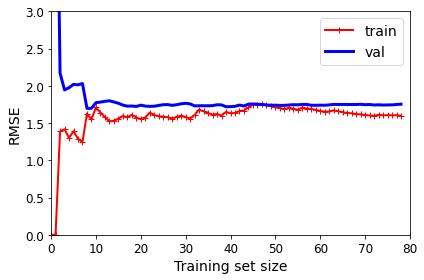

In [20]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])                         # not shown in the book
save_fig("underfitting_learning_curves_plot")   # not shown
plt.show()                                      # not shown

Saving figure learning_curves_plot


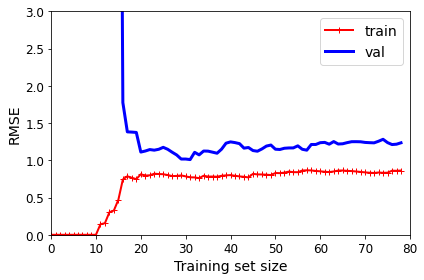

In [21]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression()) ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
save_fig("learning_curves_plot")  # not shown
plt.show()

## Regularized Linear Models 

### Ridge Regression 

In [22]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

In [23]:
from sklearn.linear_model import Ridge

#cholesky - uses the standard scipy.linalg.solve function to obtain a closed-form solution
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

#sad - Stochastic Average Gradient 
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

ridge_reg = Ridge(alpha=1, solver="saga", random_state=42)
ridge_reg.fit(X, y)
print(ridge_reg.predict([[1.5]]))

[[1.55071465]]
[[1.5507201]]
[[1.55077902]]


In [24]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

Saving figure ridge_regression_plot


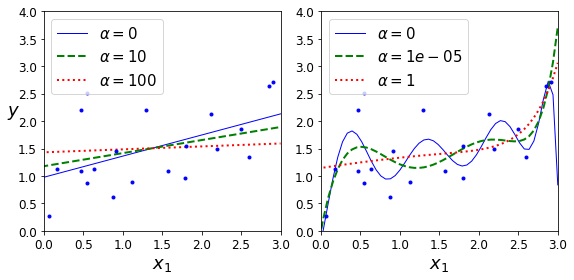

In [25]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

X_new=np.linspace(-3, 3, 100).reshape(100, 1)

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

save_fig("ridge_regression_plot")
plt.show()

### Lasso Regression 

/home/mbm/venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.8028677038274545, tolerance: 0.0009294783355207351
  positive)


Saving figure lasso_regression_plot


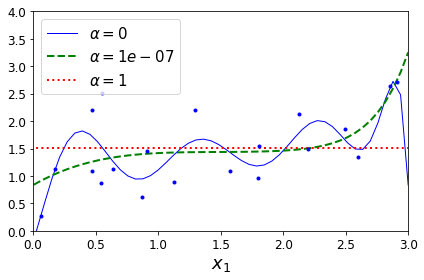

In [26]:
from sklearn.linear_model import Lasso


plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

save_fig("lasso_regression_plot")
plt.show()

[ 1.16346929 -2.59302622  1.66331151  0.46274096 -0.17294882 -0.42596929
 -0.25483553 -0.02991911  0.18014254  0.47396762]


/home/mbm/venv/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2.410787267453658, tolerance: 0.0009294783355207351
  positive)


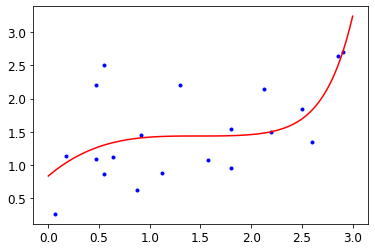

In [27]:
X_new2 = np.linspace(0, 3, 100).reshape(100, 1)

model = Lasso(alpha=0.0001)
model = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("std_scaler", StandardScaler()),
    ("lasso_reg", model)])
model.fit(X, y)
model_predict = model.predict(X_new2)

print(model.named_steps['lasso_reg'].coef_)


plt.plot(X, y, "b.")
plt.plot(X_new2, model_predict, "r-")
plt.show()

### ElasticNet

In [28]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

### Early stopping

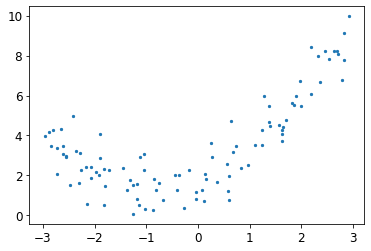

In [29]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 2 + X + 0.5 * X**2 + np.random.randn(m, 1)

X_train, X_val, y_train, y_val = train_test_split(X[:50], y[:50].ravel(), test_size=0.5, random_state=10)

plt.scatter(X, y, s=5)

In [30]:
x_epoches = np.arange(1000)
y_train_error = np.zeros((1000,), dtype=float)
y_val_error = np.zeros((1000,), dtype=float)

In [31]:
from sklearn.base import clone

poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

#warm_start=True - означает что sgd_reg продолжет обучаться с того места где остановился,
#а не с начала (не осуществляет запуск обучения с самого начала)
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
best_error = 0

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    y_train_error[epoch] = mean_squared_error(y_train, y_train_predict)
    y_val_error[epoch] = val_error
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)
        best_error = val_error

best epoch: 239
best error: 1.1624590535779686


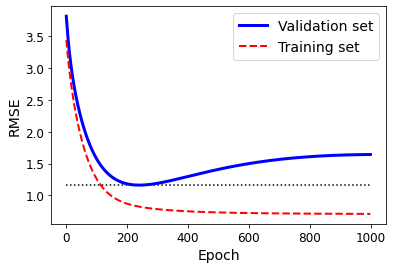

In [32]:
best_error = np.sqrt(best_error)

print("best epoch:", best_epoch)
print("best error:", best_error)

plt.plot([0, 1000], [best_error, best_error], "k:")
plt.plot(np.sqrt(y_val_error), "b-", linewidth=3, label="Validation set")
plt.plot(np.sqrt(y_train_error), "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right", fontsize=14)
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("RMSE", fontsize=14)
plt.show()

## Logistic Regression

### Estimating Probabilities

In [33]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris["data"][:, 3:] #pental width
y = (iris["target"] == 2).astype(np.int) # 1 if Iris-Virginica, else 0

print(iris.keys())

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


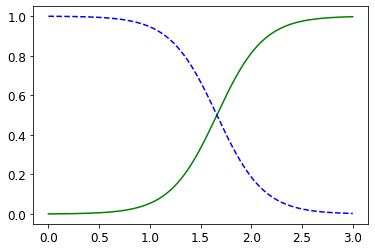

In [34]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(n_jobs=-1)
log_reg.fit(X, y)

X_new = np.linspace(0, 3, 1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)

plt.plot(X_new, y_proba[:, 1], "g-",  label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label="Not Iris-Virginica")

In [35]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42, n_jobs=-1)
log_reg.fit(X, y)

LogisticRegression(C=10000000000, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

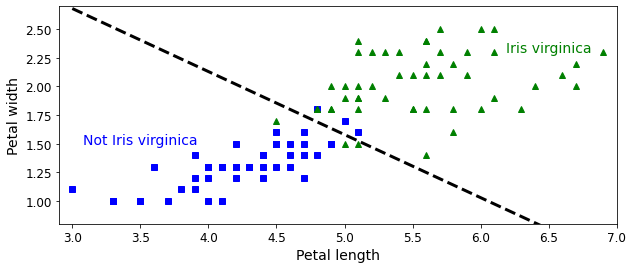

In [36]:
plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

mk1 = log_reg.coef_[0][0]
mk2 = log_reg.coef_[0][1]
mk3 = log_reg.intercept_[0]
mx_to_boundary = np.array([3, 7])
my_to_boundary = -(mk1*mx_to_boundary + mk3)/mk2

plt.plot(mx_to_boundary, my_to_boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.show()

### Softmax Regression

In [37]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [38]:
print(softmax_reg.predict([[5, 2]]))
print(softmax_reg.predict_proba([[5, 2]]))

[2]
[[6.38014896e-07 5.74929995e-02 9.42506362e-01]]


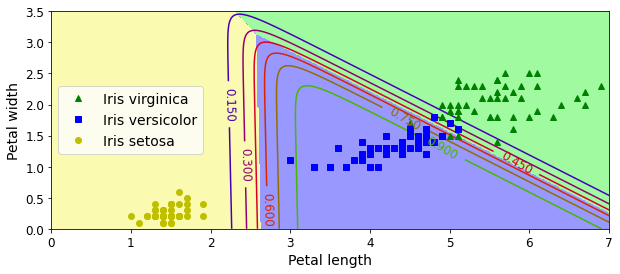

In [39]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500),
        np.linspace(0, 3.5, 200),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

#shape (nx3), в каждой колонке вероятность принадлежности к одному из 3х классов
y_proba = softmax_reg.predict_proba(X_new)
#shape(nx1), в каждой строке индекс, соотетствующий одному из 3х классов 0, 1 или 2
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape) #для класса с индексом 1
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
#X[:, 0] - колонка petal length, X[:, 1] - клонка petal width
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap) #отрисовывает цветом background контуры
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg) #строит линии вероятностей соответствия классу 1
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

# Задания

## Задание 1

What Linear Regression training algorithm can you use if you have a training set with millions of features?

Все дело в матричных умножениях, используемые в нормальных выражения: при росте кол-ва параметров класса, ввиду 
сложности О(n^3) для матричных умножений, рост времени выполнения значительный. В случае использования градиентного
спуска используется формула вычисления частичных производных для оптимизации значения параметров модели. В этой
формуле так же используются матричные умножения, но используется формула:

gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

В этой формуле для бинарной классификации выражение X_b.dot(theta) дает матрицу формы (nx1) - по сути это вектор.
Таким образом, увеличение кол-ва параметров увеличивает сложность вычисления линейно.

## Задание 2

Suppose the features in your training set have very different scales. What algorithms might suffer from this, and how? What can you do about it?

Конечно алгоритмы использующие градиентный спуск будут страдать от этого потому, что при разной размерности параметров класса алгоритму потребует проделать больший путь для оптимизации весовых коэффициентов модели для тех параметров, которые имеют большую размерность.

## Задание 3

Can Gradient Descent get stuck in a local minimum when training a Logistic Regression model?

Функция стоимости логистической регрессии выпуклая и, соответственно, не имет локальных минимумов.

## Задание 4

Do all Gradient Descent algorithms lead to the same model provided you let them run long enough?

Алгоритмы на основе стахостического градиентного спуска предполагают корректировку learning_rate в процессе обучения. Соответтсвенно если функция стоимости предполагает локальные минимумы, то алгоритмы градиентного спуска могут показывать разные результаты. Но при корректной настройки изменения learning_rate и отсуттсвия локальных минимумов функции стоимости алгоритмы будут давать примерно схожие результаты

## Задание 5

Suppose you use Batch Gradient Descent and you plot the validation error at every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?

Если на тренировочном наборе ошибка уменьшается, а на validation растет, то это свидетельствует о переобучении. Если на тренировочном наборе ошибка тоже растет, тогда необходимо понизить learning_rate.

## Задание 6

Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?

Стохастическая природа алгоритма такая, что на отдельных наборах данных или порциях наборов данныех ошибка может и возрастать. Останавливать можно только если будет опредлена четка тенденция к переобучению.

## Задание 7

Which Gradient Descent algorithm (among those we discussed) will reach the vicinity of the optimal solution the fastest? Which will actually converge? How can you make the others converge as well?

batch gradient descent сходится, остальные топчатьяс вокруг оптимального решения. Чтобы остальные так же были близки к оптимальному решению необходимо существенно снизить learning_rate. Поскольку стохастические градиентный спуск (или пакетный с малым размером пакета) выполняется очень быстро, то вероятно он достигнет окресностий оптимального решения быстрее.

## Задание 8

Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?

Большая ошибка на validation наборе, чем на training свидетельствует о переобуччении модели на training set. Возможно кол-во данных в тренировочном наборе мало.

One way to try to fix this is to reduce the polynomial degree: a model with fewer degrees of freedom is less likely to overfit. Another thing you can try is to regularize the model—for example, by adding an ℓ2 penalty (Ridge) or an ℓ1 penalty (Lasso) to the cost function. This will also reduce the degrees of freedom of the model. Lastly, you can try to increase the size of the training set.

## Задание 9

Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?

Модель характеризуется высоким смещением (недообучена). Следует попробовать уменьшить параметр регуляризации.

## Задание 10

Why would you want to use:
• Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?
• Lasso instead of Ridge Regression?
• Elastic Net instead of Lasso?

1) Использование регуляризации позволяет избавиться (или уменьшить) переобучение (если оно обнаружено при простой линейной регрессии)
A model with some regularization typically performs better than a model without any regularization, so you should generally prefer Ridge Regression over plain Linear Regression.
2) Лассо использует l1 норму, а Ridge норму l2. l1 норма старается занулить неважные весовые коэффициентты.
This is a way to perform feature selection automatically, which is good if you suspect that only a few features actually matter.When you are not sure, you should prefer Ridge Regression.
3) Когда необходим компромисный вариант между Ridge и Lasso.
Elastic Net is generally preferred over Lasso since Lasso may behave erratically in some cases (when several features are strongly correlated or when there are more features than training instances). However, it does add an extra hyperparameter to tune. If you just want Lasso without the erratic behavior, you can just use Elastic Net with an l1_ratio close to 1.

## Задание 11

Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime.Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?

Нужно 2е отдельные модели логистической регрессиии, поскольку возможны 4е варианта состояния

## Задание 12 (для линейной регрессии)

решение с ошибкой, т.к. проверять нужно для validation set

In [198]:
def mlinerfunc(x, q):
    return x*q[0] + q[1] 

def m_sq_error(x, q, y, size):
    sum = 0
    y_ = x.dot(q)
    error = (y_ - y)**2
    sum =0
    for i in range(size):
        sum +=  error[i]
    return sum / size

def m_gradient_descent(x, y, epoches, eta=0.01, early_stop=True, print_log=True):
    size = len(y)
    q = np.random.randn(x.shape[1], 1)
    prev_error = np.inf
    for i in range(epoches):
        error = m_sq_error(x, q, y, size)
        if print_log:
            print("epoch {0}, mean square error = {1}".format(i, error))
        if (error > prev_error and early_stop):
            print("m_gradient_descent() early stoped (epoch = {0})".format(i))
            break
        prev_error = error
        gradients = 2/size * x.T.dot(x.dot(q) - y)
        if print_log:
            print("change q by:", -gradients * eta)
        q = q - eta * gradients
    return q, prev_error


target model: [7, 8]
m_gradient_descent() early stoped (epoch = 4523)
model weights: [7.03054436 7.97967493]
model error: [0.91788169]


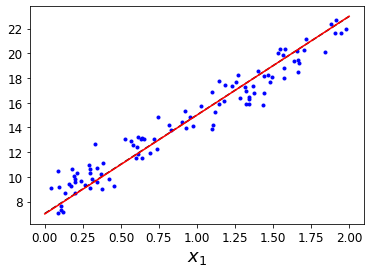

In [203]:
print("target model:", [7, 8])
mx = 2 * np.random.rand(100, 1)
my = 8 + 7 * mx + np.random.randn(100, 1)

mx_ones = np.ones((mx.shape), dtype=int)
mx_ = np.c_[mx, mx_ones]

model, error = m_gradient_descent(mx_, my, epoches=10000, eta=0.01, early_stop=True, print_log=False)
print("model weights:", model.ravel())
print("model error:", error)

model_x = np.array([0, 2])
model_y = np.c_[[1,1], model_x].dot(model)
origin_y = np.c_[[1,1], model_x].dot([7,8])

plt.plot(mx, my, "b.")
plt.plot(model_x, model_y, "k--") #model curve
plt.plot(model_x, origin_y, "r-") #target curve
plt.xlabel("$x_1$", fontsize=18)
plt.show()

## Задание 12 (Softmax)

In [214]:
np.random.seed(2042)

#подготовка данных 
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]
X_with_bias = np.c_[np.ones([len(X), 1]), X]


#разделение данных на наборы
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

#преобразование данных в массиве y, содержащий индекс класса (1, 2 или 3) в бинарную матрицу формы (m, 3)
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

#тестирование
print(y_train[:10])
print(to_one_hot(y_train[:10]))

[0 1 2 1 1 0 1 1 1 0]
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [1. 0. 0.]]


In [227]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

n_in = X_train.shape[1] # == 3 (2 features plus the bias term)
n_out = len(np.unique(y_train))   # == 3 (3 iris classes)

Функция стоимости:

$J(\mathbf{\Theta}) =
- \dfrac{1}{m}\sum\limits_{i=1}^{m}\sum\limits_{k=1}^{K}{y_k^{(i)}\log\left(\hat{p}_k^{(i)}\right)}$

Уравнение для вычисления градиентов:

$\nabla_{\mathbf{\theta}^{(k)}} \, J(\mathbf{\Theta}) = \dfrac{1}{m} \sum\limits_{i=1}^{m}{ \left ( \hat{p}^{(i)}_k - y_k^{(i)} \right ) \mathbf{x}^{(i)}}$

Note that $\log\left(\hat{p}_k^{(i)}\right)$ may not be computable if $\hat{p}_k^{(i)} = 0$. So we will add a tiny value $\epsilon$ to $\log\left(\hat{p}_k^{(i)}\right)$ to avoid getting `nan` values.

In [240]:
def m_softmax_regression(x, y, size_m, n_inputs, n_outputs, eta=0.01, epoches=5001, log=True):
    epsilon = 1e-7
    Theta = np.random.randn(n_inputs, n_outputs)
    for iteration in range(epoches):
        logits = x.dot(Theta)
        Y_proba = softmax(logits)
        loss = -np.mean(np.sum(y * np.log(Y_proba + epsilon), axis=1))
        error = Y_proba - y
        if iteration % 500 == 0 and log==True:
            print(iteration, loss)
        gradients = 1/m * x.T.dot(error)
        Theta = Theta - eta * gradients
    return Theta, loss

theta, loss = m_softmax_regression(X_train, Y_train_one_hot, size_m=len(X_train), 
                                   n_inputs=n_in, n_outputs=n_out, log=True)
print("theta:\n", theta)

0 1.418046555870136
500 0.7665679334488721
1000 0.6527057777298566
1500 0.5803570828526854
2000 0.5303607715805734
2500 0.4933367730914639
3000 0.4644538915036075
3500 0.4410338590768238
4000 0.42148316328131064
4500 0.4047936317645485
5000 0.3902936707756113
theta:
 [[ 2.54370533 -0.51291213 -3.17920448]
 [ 0.17122016  0.31516782  0.3859276 ]
 [-1.68376316  1.90569377  3.42004184]]


In [239]:
#Проверим на validation set
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
print("accuracy_score:", accuracy_score)

accuracy_score: 0.9666666666666667


Добавим регуляризацию l2. Коэффициент смещения штрафоваться не будет. Кроме того увеличим коэффициент learning_rate (eta)

In [ ]:
np.zeros([1, n_outputs])

In [257]:
def m_softmax_regression(x, y, size_m, n_inputs, n_outputs, eta=0.01, epoches=5001, log=True, alpha=0.1):
    epsilon = 1e-7
    Theta = np.random.randn(n_inputs, n_outputs)
    for iteration in range(epoches):
        logits = x.dot(Theta)
        Y_proba = softmax(logits)
        loss = -np.mean(np.sum(y * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = loss + alpha*l2_loss
        error = Y_proba - y
        if iteration % 500 == 0 and log==True:
            print(iteration, loss)
        gradients = 1/m * x.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
        Theta = Theta - eta * gradients
    return Theta, loss

theta, loss = m_softmax_regression(X_train, Y_train_one_hot, size_m=len(X_train), 
                                   n_inputs=n_in, n_outputs=n_out, log=True, eta=0.1, alpha=0.1)
print("theta:\n", theta)

0 2.0013233170463645
500 0.5284716602412995
1000 0.5020494986981717
1500 0.49410755177106347
2000 0.491062117220093
2500 0.48979961909855896
3000 0.4892555554042143
3500 0.48901579922904376
4000 0.4889086847382136
4500 0.48886041021308424
5000 0.48883852993433297
theta:
 [[ 5.25776948  1.32577369 -3.962159  ]
 [-1.09796561  0.12521145  0.97275417]
 [-0.43740663 -0.13647201  0.57387863]]


более высокая ошибка объясняется добавлением l2 нормы в функцию стоимости. Проверим точность новых данных

In [258]:
#Проверим на validation set
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
print("accuracy_score:", accuracy_score)

accuracy_score: 1.0


добавим раннюю остановку

In [361]:
def m_mean_loss(x, y_one_hote, th, alpha=0.1):
    epsilon = 1e-7
    logits = x.dot(th)
    proba = softmax(logits)
    loss = -np.mean(np.sum(y_one_hote * np.log(proba + epsilon), axis=1))
    l2 = 1/2 * np.sum(np.square(th[1:]))
    loss += alpha * l2
    error = proba - y_one_hote
    return loss, proba, error

m = len(X_train)
epoches = 5001
eta = 0.1
alpha = 0.1
prev_valid_loss = np.inf
Theta = np.random.randn(n_inputs, n_outputs)

for i in range(epoches):
    loss, _, _ = m_mean_loss(X_valid, Y_valid_one_hot, Theta, alpha)
    
    if (loss > prev_valid_loss):
        print(i, "early stop", train_loss)
        break
    else:
        prev_valid_loss = loss
    
    train_loss, proba, error = m_mean_loss(X_train, Y_train_one_hot, Theta, alpha)
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]    
    
    if i % 500 == 0:
        print(i, train_loss) #loss without l2 penalty
    
    Theta = Theta - eta * gradients

    
print("theta:\n", theta)

0 2.4246914648020335
500 0.5278427041363905
1000 0.5017865217416401
1500 0.4940086050739439
2000 0.4910219369087097
2500 0.48978251906205383
2631 early stop 0.4895986429159529
theta:
 [[ 5.08168301  1.1441442  -4.22318396]
 [-1.10370944  0.12090033  0.9828091 ]
 [-0.43882117 -0.13736239  0.57618355]]


In [362]:
#Проверим на validation set
logits = X_valid.dot(theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
print("accuracy_score:", accuracy_score)

#Проверим на test set
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
print("accuracy_score:", accuracy_score)

accuracy_score: 1.0
accuracy_score: 0.9333333333333333
